In [1]:
import tensorflow
from tensorflow import keras
import pandas as pd
import numpy as np

In [29]:

train_df = pd.read_csv('./data/train.csv')
np.random.shuffle(train_df.values)

In [30]:
len(train_df)

4000

In [31]:
train_df.head()

,x,y,color
0,0.771977,1.700964,0.0
1,4.125399,5.289247,0.0
2,4.352491,3.360607,1.0
3,2.516390,1.852236,1.0
4,4.868295,3.767940,1.0


In [32]:
model=keras.Sequential(
[
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    # has 4 neurons in this hidden layer
    # has input shape 2 (input to this hidden layer)
    # this is because input vector has 2 features: x, y
    # activation function is the func of this hidden layer
    keras.layers.Dense(2, activation='sigmoid')
])

In [33]:
# see tensorflow doc to see all kinds of loss functions
model.compile(optimizer='adam', 
	          loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
	          metrics=['accuracy'])

In [34]:
x = np.column_stack((train_df.x.values, train_df.y.values))

In [35]:
#x here represents the whole input, so train_df.x and train_df.y have to be stacked together at first
model.fit(x, train_df.color.values, batch_size=4, epochs=5)

Epoch 1/5


D:\internship\truminds_2022\testingGNN\env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 1s 628us/step - loss: 0.5115 - accuracy: 0.8705
Epoch 2/5
1000/1000 [==============================] - 1s 619us/step - loss: 0.0488 - accuracy: 0.9998
Epoch 3/5
1000/1000 [==============================] - 1s 639us/step - loss: 0.0188 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 1s 619us/step - loss: 0.0087 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 1s 630us/step - loss: 0.0037 - accuracy: 1.0000


In [36]:
test_df = pd.read_csv('./data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

print("EVALUATION")
model.evaluate(test_x, test_df.color.values)


EVALUATION
32/32 [==============================] - 3s 1ms/step - loss: 0.0028 - accuracy: 1.0000


D:\internship\truminds_2022\testingGNN\env\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[0.0028301046695560217, 1.0]

In [37]:
len(test_df)

1000

In [41]:
from matplotlib import pyplot as plt


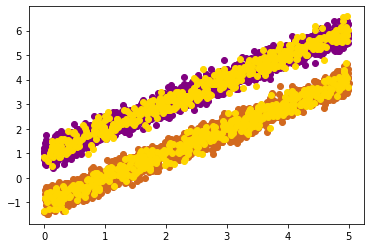

In [46]:
for i in range (len(train_df)):
   
    color='chocolate'
    if (train_df.loc[i].at['color']==0): 
        color='purple'
    plt.scatter(train_df.loc[i].at['x'], train_df.loc[i].at['y'], c=color)
    
    
for i in range (len(test_df)):
   
    color='gold'
    plt.scatter(test_df.loc[i].at['x'], test_df.loc[i].at['y'], c=color)
    

In [49]:
test_df.head()

,x,y,color
0,2.684292,3.867108,0.0
1,2.707883,4.002614,0.0
2,2.705905,3.859686,0.0
3,4.536191,5.240051,0.0
4,3.656068,4.461771,0.0
